In [2]:
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
##Importing the data

df = pd.read_csv("pageblock.csv")
df.head()
df.columns= ['height','length','area','eccen','p_black','p_and','mean_tr','blackpix','blackand','wb_trans','classification']
df.classification = df.classification-1

In [4]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0,stratify = y)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Support vector machine tuning

In [24]:
Cs = np.linspace(0.01,2,25, endpoint=True)
gammas = np.linspace(0.001,2,25, endpoint=True)
kernels = ['linear','rbf']

In [20]:
from sklearn.svm import SVC

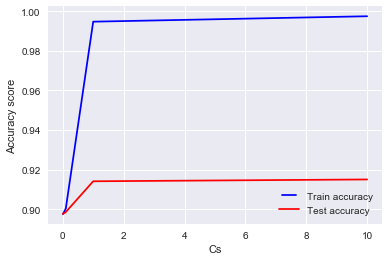

In [21]:
train_results = []
test_results = []
for C in Cs:
    svc = SVC(C=C)
    svc.fit(X_train, y_train)
    train_pred = svc.predict(X_train)
    acc_train = metrics.accuracy_score(y_train,train_pred)
    train_results.append(acc_train)
    test_pred = svc.predict(X_test)
    acc_test = metrics.accuracy_score(y_test,test_pred)
    test_results.append(acc_test)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(Cs, train_results, 'b', label='Train accuracy')
line2, = plt.plot(Cs, test_results,'r' ,label='Test accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Cs')
plt.show()

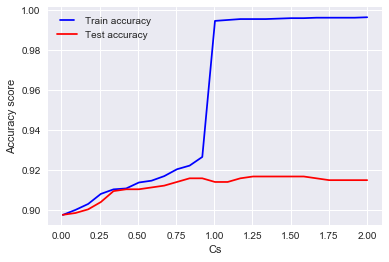

In [23]:
Cs = np.linspace(0.01,2,25, endpoint=True)

train_results = []
test_results = []
for C in Cs:
    svc = SVC(C=C)
    svc.fit(X_train, y_train)
    train_pred = svc.predict(X_train)
    acc_train = metrics.accuracy_score(y_train,train_pred)
    train_results.append(acc_train)
    test_pred = svc.predict(X_test)
    acc_test = metrics.accuracy_score(y_test,test_pred)
    test_results.append(acc_test)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(Cs, train_results, 'b', label='Train accuracy')
line2, = plt.plot(Cs, test_results,'r' ,label='Test accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Cs')
plt.show()

In [ ]:
gammas = np.linspace(0.001,0.2,25, endpoint=True)

train_results = []
test_results = []
for gamma in gammas:
    svc = SVC(gamma=gamma)
    svc.fit(X_train, y_train)
    train_pred = svc.predict(X_train)
    acc_train = metrics.accuracy_score(y_train,train_pred)
    train_results.append(acc_train)
    test_pred = svc.predict(X_test)
    acc_test = metrics.accuracy_score(y_test,test_pred)
    test_results.append(acc_test)


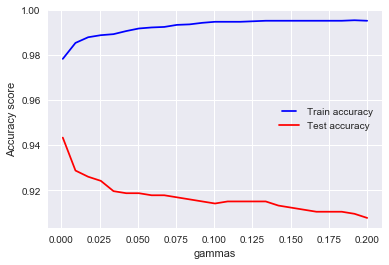

In [29]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(gammas, train_results, 'b', label='Train accuracy')
line2, = plt.plot(gammas, test_results,'r' ,label='Test accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('gammas')
plt.show()

#### Decision Trees parameter tuning

The best parameters from previous analysis

{'criterion': 'entropy', 'max_depth': 200, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 12}

In [5]:
from sklearn.tree import DecisionTreeClassifier
params = {'criterion': 'entropy', 'max_depth': 200, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 12}
decision_tree_clf = DecisionTreeClassifier(**params)
decision_tree_clf_model = decision_tree_clf.fit(X_train, y_train)
print(decision_tree_clf_model)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=200,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=12,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [6]:
dt_tree_y_pred = decision_tree_clf.predict(X_test)

In [7]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, dt_tree_y_pred)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, dt_tree_y_pred)

In [8]:
cm

array([[968,   6,   0,   1,   8],
       [  7,  58,   0,   1,   0],
       [  1,   0,   4,   0,   0],
       [  0,   1,   0,  17,   0],
       [ 10,   0,   0,   0,  13]], dtype=int64)

In [9]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator =decision_tree_clf,X =X, y=y,cv=5)
print("\nTrained based on CV accuracy: mean score",accuracies.mean())
print("\nTrained based on CV accuracy: variance score",accuracies.std())


Trained based on CV accuracy: mean score 0.9572240926475907

Trained based on CV accuracy: variance score 0.016597265513983522


##### max_depth

In [10]:
from sklearn import metrics

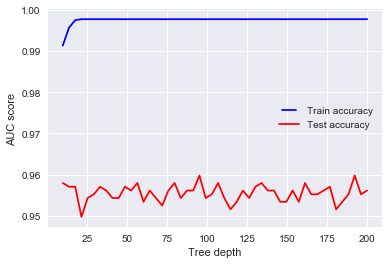

In [13]:
max_depths = np.linspace(10,200, 50, endpoint=True)

train_results = []
test_results = []
for max_depth in max_depths:
    rf = DecisionTreeClassifier(max_depth=max_depth)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    acc_train = metrics.accuracy_score(y_train,train_pred)
    train_results.append(acc_train)
    test_pred = rf.predict(X_test)
    acc_test = metrics.accuracy_score(y_test,test_pred)
    test_results.append(acc_test)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train accuracy')
line2, = plt.plot(max_depths, test_results,'r' ,label='Test accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

tree depth of 25 seems to work well

##### max_depth and max_features

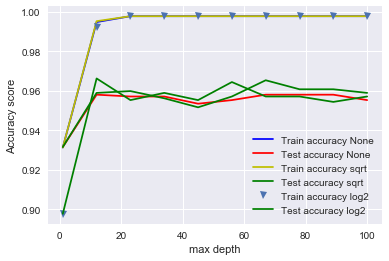

In [15]:
max_depths = np.linspace(1,100,10, endpoint=True)
max_features = [None, 'sqrt','log2']
train_results_None = []
test_results_None= []
train_results_sqrt = []
test_results_sqrt = []
train_results_log2 = []
test_results_log2= []
for max_depth in max_depths:
    rf = DecisionTreeClassifier(max_depth=max_depth,max_features=None)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    acc_train = metrics.accuracy_score(y_train,train_pred)
    train_results_None.append(acc_train)
    test_pred = rf.predict(X_test)
    acc_test = metrics.accuracy_score(y_test,test_pred)
    test_results_None.append(acc_test)
    rf = DecisionTreeClassifier(max_depth=max_depth,max_features='sqrt')
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    acc_train = metrics.accuracy_score(y_train,train_pred)
    train_results_sqrt.append(acc_train)
    test_pred = rf.predict(X_test)
    acc_test = metrics.accuracy_score(y_test,test_pred)
    test_results_sqrt.append(acc_test)
    rf = DecisionTreeClassifier(max_depth=max_depth,max_features='log2')
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    acc_train = metrics.accuracy_score(y_train,train_pred)
    train_results_log2.append(acc_train)
    test_pred = rf.predict(X_test)
    acc_test = metrics.accuracy_score(y_test,test_pred)
    test_results_log2.append(acc_test)
    
from matplotlib.legend_handler import HandlerLine2D
plt.plot(max_depths,train_results_None,  'b', label='Train accuracy None')
plt.plot(max_depths,test_results_None, 'r' ,label='Test accuracy None')
plt.plot(max_depths,train_results_sqrt,  'y', label='Train accuracy sqrt')
plt.plot(max_depths,test_results_sqrt, 'g' ,label='Test accuracy sqrt')
plt.plot(max_depths,train_results_log2,  'v', label='Train accuracy log2')
plt.plot(max_depths,test_results_log2, 'g' ,label='Test accuracy log2')
plt.legend()
plt.ylabel('Accuracy score')
plt.xlabel('max depth')
plt.show()

##### Criterion and min_samples_leaf

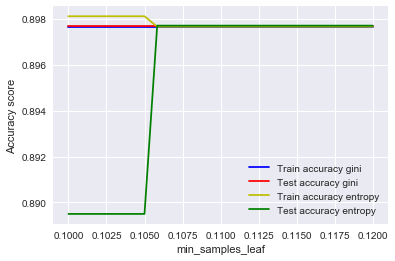

In [16]:
min_samples_leafs = np.linspace(0.1, 0.12, 25, endpoint=True)
criterion = ['entropy','gini']
train_results_gini = []
test_results_gini = []
train_results_entropy = []
test_results_entropy = []
for min_samples_leaf in min_samples_leafs:
    rf = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf,criterion='entropy')
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    acc_train = metrics.accuracy_score(y_train,train_pred)
    train_results_gini.append(acc_train)
    test_pred = rf.predict(X_test)
    acc_test = metrics.accuracy_score(y_test,test_pred)
    test_results_gini.append(acc_test)
    rf = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf,criterion='gini')
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    acc_train = metrics.accuracy_score(y_train,train_pred)
    train_results_entropy.append(acc_train)
    test_pred = rf.predict(X_test)
    acc_test = metrics.accuracy_score(y_test,test_pred)
    test_results_entropy.append(acc_test)
    
from matplotlib.legend_handler import HandlerLine2D
plt.plot(min_samples_leafs, train_results_gini, 'b', label='Train accuracy gini')
plt.plot(min_samples_leafs, test_results_gini,'r' ,label='Test accuracy gini')
plt.plot(min_samples_leafs, train_results_entropy, 'y', label='Train accuracy entropy')
plt.plot(min_samples_leafs, test_results_entropy,'g' ,label='Test accuracy entropy')
plt.legend()
plt.ylabel('Accuracy score')
plt.xlabel('min_samples_leaf')
plt.show()


##### min_samples_split and criterion

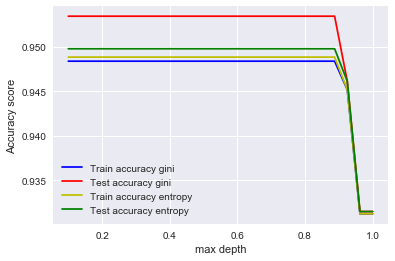

In [17]:
min_samples_splits = np.linspace(0.1, 1.0,25, endpoint=True)
criterion = ['entropy','gini']
train_results_gini = []
test_results_gini = []
train_results_entropy = []
test_results_entropy = []
for min_samples_split in min_samples_splits:
    rf = DecisionTreeClassifier(min_samples_split=min_samples_split,criterion='entropy')
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    acc_train = metrics.accuracy_score(y_train,train_pred)
    train_results_gini.append(acc_train)
    test_pred = rf.predict(X_test)
    acc_test = metrics.accuracy_score(y_test,test_pred)
    test_results_gini.append(acc_test)
    rf = DecisionTreeClassifier(min_samples_split=min_samples_split,criterion='gini')
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    acc_train = metrics.accuracy_score(y_train,train_pred)
    train_results_entropy.append(acc_train)
    test_pred = rf.predict(X_test)
    acc_test = metrics.accuracy_score(y_test,test_pred)
    test_results_entropy.append(acc_test)
    
from matplotlib.legend_handler import HandlerLine2D
plt.plot(min_samples_splits, train_results_gini, 'b', label='Train accuracy gini')
plt.plot(min_samples_splits, test_results_gini,'r' ,label='Test accuracy gini')
plt.plot(min_samples_splits, train_results_entropy, 'y', label='Train accuracy entropy')
plt.plot(min_samples_splits, test_results_entropy,'g' ,label='Test accuracy entropy')
plt.legend()
plt.ylabel('Accuracy score')
plt.xlabel('max depth')
plt.show()


#### RandomForest Parameter Tuning

In [30]:
from sklearn.ensemble import RandomForestClassifier

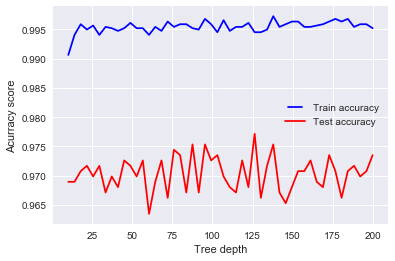

In [32]:
max_depths = np.linspace(10,200, 50, endpoint=True)

train_results = []
test_results = []
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    acc_train = metrics.accuracy_score(y_train,train_pred)
    train_results.append(acc_train)
    test_pred = rf.predict(X_test)
    acc_test = metrics.accuracy_score(y_test,test_pred)
    test_results.append(acc_test)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train accuracy')
line2, = plt.plot(max_depths, test_results,'r' ,label='Test accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Acurracy score')
plt.xlabel('Tree depth')
plt.show()

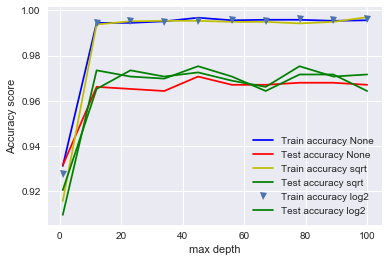

In [33]:
max_depths = np.linspace(1,100,10, endpoint=True)
max_features = [None, 'sqrt','log2']
train_results_None = []
test_results_None= []
train_results_sqrt = []
test_results_sqrt = []
train_results_log2 = []
test_results_log2= []
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth,max_features=None)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    acc_train = metrics.accuracy_score(y_train,train_pred)
    train_results_None.append(acc_train)
    test_pred = rf.predict(X_test)
    acc_test = metrics.accuracy_score(y_test,test_pred)
    test_results_None.append(acc_test)
    rf = RandomForestClassifier(max_depth=max_depth,max_features='sqrt')
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    acc_train = metrics.accuracy_score(y_train,train_pred)
    train_results_sqrt.append(acc_train)
    test_pred = rf.predict(X_test)
    acc_test = metrics.accuracy_score(y_test,test_pred)
    test_results_sqrt.append(acc_test)
    rf = RandomForestClassifier(max_depth=max_depth,max_features='log2')
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    acc_train = metrics.accuracy_score(y_train,train_pred)
    train_results_log2.append(acc_train)
    test_pred = rf.predict(X_test)
    acc_test = metrics.accuracy_score(y_test,test_pred)
    test_results_log2.append(acc_test)
    
from matplotlib.legend_handler import HandlerLine2D
plt.plot(max_depths,train_results_None,  'b', label='Train accuracy None')
plt.plot(max_depths,test_results_None, 'r' ,label='Test accuracy None')
plt.plot(max_depths,train_results_sqrt,  'y', label='Train accuracy sqrt')
plt.plot(max_depths,test_results_sqrt, 'g' ,label='Test accuracy sqrt')
plt.plot(max_depths,train_results_log2,  'v', label='Train accuracy log2')
plt.plot(max_depths,test_results_log2, 'g' ,label='Test accuracy log2')
plt.legend()
plt.ylabel('Accuracy score')
plt.xlabel('max depth')
plt.show()